# Get covid19 cases of every german county
Used to map the Covid-19 cases of germany on a map

In [1]:
from json2xml.utils import readfromurl    # to convert the json from the API into a python list
import json    # to save the data as json in a file
import os.path    # to check if their's a local file with the API-data or if a new API pull is inevitable

## Control
Set variables to true to trigger the action described by the variables name.

In [ ]:
# decides whether a new pull from the API is made or if a local backup is used
covid19_new_pull_from_api = True

In [3]:
# could get set from the file executing this one
try:
    no_outputs_from_file_get_covid19_cases_of_german_counties
except NameError:
    None
else:
    None

## Get the data and safe it in a file
Get the correct URLs to the arcgis server:
We must pull all counties separatedly because the API only allows 1000 datapoints at a time.

In [4]:
# if the data does not contain that many counties, the program raises an error and pulls from a local backup of the API pull
number_of_counties = 412

In [ ]:
get_data_for_county()

In [5]:
# check if a local pull of the API exists and otherwise initiate a new pull from the API
if not(os.path.isfile("unmodified_data/german_covid19.txt")):
    covid19_new_pull_from_api = True

# check if new pull from the API is necessary or wished and
# if it is even possible otherwise "pull" from local backup
if county_shapes_new_pull_from_api:
    # get data - the url is kept in this long and bit ugly format to easily copy and check it manually
    county_shapes_raw = readfromurl("https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/RKI_Landkreisdaten/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")


    # data is maybe faulty: if so report to user and use local backup of old API pull
    if len(county_shapes_raw["features"]) != number_of_counties:
        county_shapes_new_pull_from_api = False
        print("The provided data from the API does not have the preset number of counties of" +
        "{}, it has {}.".format(number_of_counties, len(county_shapes_raw["features"])))
    # data seems to be fine: continue
    else:    # only store flawless data
        # check if the needed directory is availlable - otherwise create it
        if not(os.path.isdir("unmodified_data")): os.makedirs("unmodified_data")
        with open("unmodified_data/german_county_shapes.txt", "w") as file:
            file.write(json.dumps(county_shapes_raw))
        print("Data directly from API is ready to go!")

# Use data from local backup originating from old API pull
# new_pull_from_api gets modified in the if-statement - therefore no else-statement here
if not(county_shapes_new_pull_from_api) and not(county_shapes_use_polished_data):
    with open("unmodified_data/german_county_shapes.txt", "r") as file:
        county_shapes_raw = json.loads(file.read())
    print("Data from old API-pull is ready to go!")

Data directly from API is ready to go!


## Draw the counties
Every countys shape can be reached by calling the value of "geometry" and afterwards "rings". Kept in a very basic way to demonstrate the used data.

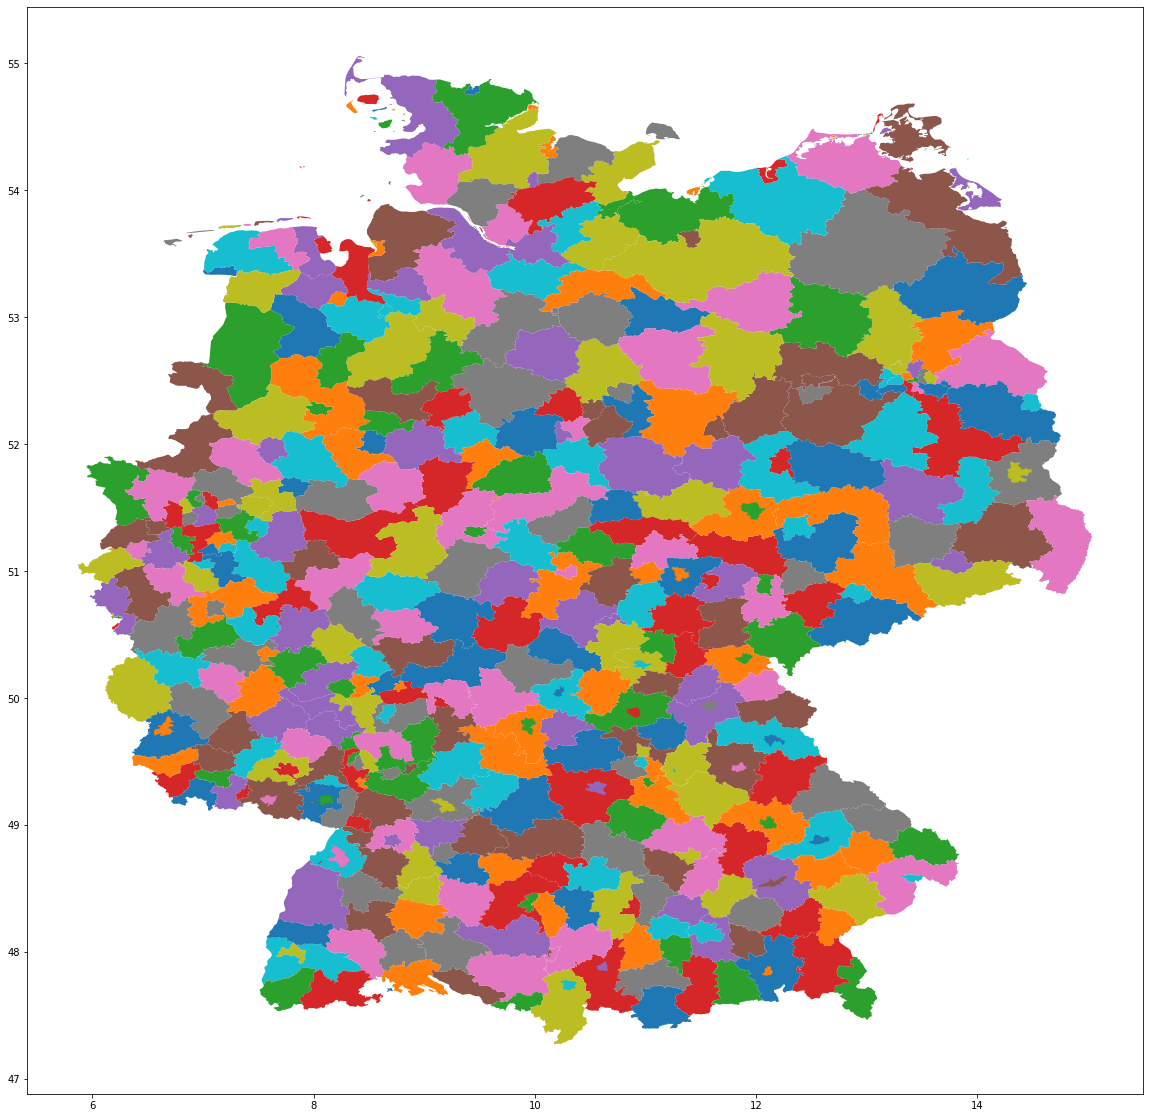

In [6]:
if plot_unmodified_county_shapes_for_rough_overview:
    plt.figure(figsize=(20, 20))    # enlarge plot
    # put all shapes into the plot
    for county in county_shapes_raw['features']:
        for polygon in county['geometry']['rings']:
            x,y = np.array(polygon).T
            plt.fill(x, y)
    plt.show()    # draw plot

## Functions for easier use of the data
### county_name_and_id(county): returns string
returns a string containing the ID of a county and it's name separated by a whitespace.
### counties_name_and_id(counties): returns string
calls county_name_and_id() for every county in counties (separated by a ", " and the last with an "and")
### draw_polygon(polygon, plot_immediately, color): returns void (could show a plot)
**polygon**<br/>
-> shape of the polygon/county
<br/>
**plot_immediately** (default: True)<br/>
-> Determines whether "plt.show()" gets executed or not. If not the plot will be drawn with all other plots created in the same manner whenever plt.show() is called - allows to draw multiple polygons in one coordinate system
<br/>
**color** (default: None (standard color sequence))<br/>
-> sets the color of the polygon
### draw_polygons(polygons, plot_single, plot_immediately , plt_color):
**polygons**<br/>
-> shapes of polygons/counties
<br/>
**plot_single** (default: False)<br/>
-> determines wether every polygon shall be drawn in it's on coordinate system or if all polygons shall be accumulated in one
<br/>
**plot_immediately** (default: True)<br/>
-> Determines whether "plt.show()" gets executed in the end or not. If not the plot will be drawn with all other plots created in the same manner whenever plt.show() is called - allows to draw multiple polygons in one coordinate system
<br/>
**color** (default: None (standard color sequence))<br/>
-> sets the color of the polygons

In [7]:
def county_name_and_id(county):
    return '{} {}'.format(county['attributes']['OBJECTID'],county['attributes']['county'])

def counties_name_and_id(counties):
    # first county, no comma:
    result = county_name_and_id(counties[0])
    # all following with comma
    for county in counties[1:-1]:
        result += ', {}'.format(county_name_and_id(county))
    # last one with " and "
    result += ' and {}'.format(county_name_and_id(counties[-1]))
    return result

if show_examples_for_functions_for_easier_use_of_the_data:
    print(county_name_and_id(county_shapes_raw['features'][0]))
    # e.g. to display county 43 to 69
    print(counties_name_and_id(county_shapes_raw['features'][42:69]))
    print()
    # e.g. to display all counties with their OBJECTID
    for county in county_shapes_raw['features']:
        print(county_name_and_id(county))

1 SK Flensburg
43 LK Uelzen, 44 LK Verden, 45 SK Delmenhorst, 46 SK Emden, 47 SK Oldenburg, 48 SK Osnabrück, 49 SK Wilhelmshaven, 50 LK Ammerland, 51 LK Aurich, 52 LK Cloppenburg, 53 LK Emsland, 54 LK Friesland, 55 LK Grafschaft Bentheim, 56 LK Leer, 57 LK Oldenburg, 58 LK Osnabrück, 59 LK Vechta, 60 LK Wesermarsch, 61 LK Wittmund, 62 SK Bremen, 63 SK Bremerhaven, 64 SK Düsseldorf, 65 SK Duisburg, 66 SK Essen, 67 SK Krefeld, 68 SK Mönchengladbach and 69 SK Mülheim a.d.Ruhr

1 SK Flensburg
2 SK Kiel
3 SK Lübeck
4 SK Neumünster
5 LK Dithmarschen
6 LK Herzogtum Lauenburg
7 LK Nordfriesland
8 LK Ostholstein
9 LK Pinneberg
10 LK Plön
11 LK Rendsburg-Eckernförde
12 LK Schleswig-Flensburg
13 LK Segeberg
14 LK Steinburg
15 LK Stormarn
16 SK Hamburg
17 SK Braunschweig
18 SK Salzgitter
19 SK Wolfsburg
20 LK Gifhorn
21 LK Goslar
22 LK Helmstedt
23 LK Northeim
24 LK Peine
25 LK Wolfenbüttel
26 LK Göttingen
27 Region Hannover
28 LK Diepholz
29 LK Hameln-Pyrmont
30 LK Hildesheim
31 LK Holzminden
32 

all default: color by standard color scheme and plot immediately


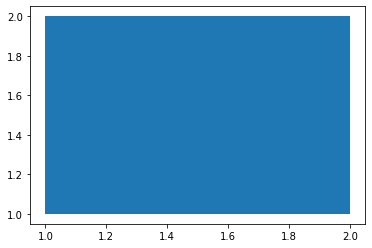

change color to red ('r')


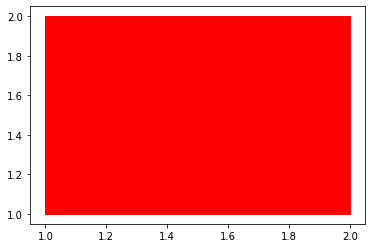

change color to red ('r') and don't draw it
cutout center of the red square from directly above and plot it (color is white)


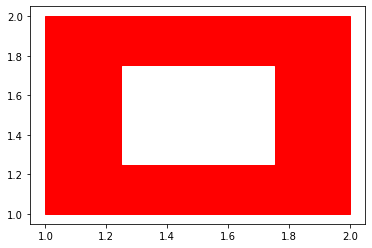

drawing multiple polygons into one plot with the draw_polygons function:


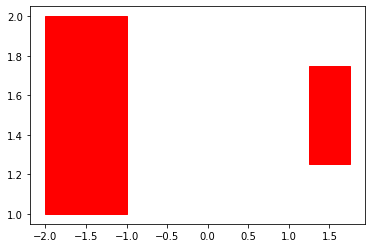

In [8]:
def draw_polygon(polygon, plot_immediately = True, plt_color = None):
    x,y = np.array(polygon).T
    if plt_color:
        plt.fill(x, y, color = plt_color)
    else:
        plt.fill(x, y)
    if plot_immediately: plt.show()


def draw_polygons(polygons, plot_single = False, plot_immediately = True, plt_color = None):
    for polygon in polygons[:-1]:
        draw_polygon(polygon, plot_single, plt_color)
    if len(polygons):
        draw_polygon(polygons[-1], plot_immediately, plt_color)




if show_examples_for_functions_for_easier_use_of_the_data:
    # e.g. to display this rectangle in
    print("all default: color by standard color scheme and plot immediately")
    draw_polygon([[1, 1], [1, 2], [2, 2], [2, 1]])


    print("change color to red ('r')")
    draw_polygon([[1, 1], [1, 2], [2, 2], [2, 1]], True, "r")


    print("change color to red ('r') and don't draw it")
    draw_polygon([[1, 1], [1, 2], [2, 2], [2, 1]], False, "r")
    print("cutout center of the red square from directly above and plot it (color is white)")
    draw_polygon([[1.25, 1.25], [1.25, 1.75], [1.75, 1.75], [1.75, 1.25]], True, "w")

    print("drawing multiple polygons into one plot with the draw_polygons function:")
    draw_polygons([[[-1, 1], [-1, 2], [-2, 2], [-2, 1]],
                   [[1.25, 1.25], [1.25, 1.75], [1.75, 1.75], [1.75, 1.25]]],
                  False, True, "r")

## Create polished version and filter the counties with multiple polygons
Every countys shape can be reached by calling the value of "geometry" and afterwards "rings".
<br/>
In the following the needed data gets saved in the county_shapes and for our purposes useless dictionary-shells get cut away.
<br/>
<br/>
Because the polygons are by far the biggest part of the data we only want to duplicate them if necessary. That is why we only reference them and only copy those we are going to modify.
This a bit risky but more efficient option is chosen because the original data
is backuped as a whole in "unmodified_data/german_county_shapes.txt" as well.
<br/><br/>
Visualization of the refernce and copy properties:

In [9]:
a = [1, 2, 3]
backup_of_a = a
a[1] = 5    # destroys the backup
print(a, backup_of_a)
a = list()    # sets a new refernce
print(a, backup_of_a)

[1, 5, 3] [1, 5, 3]
[] [1, 5, 3]


Counties with no enclaves or whatsoever have one polygon stored in the value corresponding to "rings",
all others have the cutouts or enclaves stored as extra polygons.
<br/>
So we go through all the counties and if one of them has more than one polygon stored as shape, we store it's index in index_of_counties_with_multiple_polygons
<br/><br/>
**!!!Remember to store the original polygons under data['features'][county_index]['geometry']['raw_rings'] before you modify it!!!**<br/>
**!!!And only modify them by setting the whole array, by manipulating single elements no new reference is created!!!**

In [10]:
county_shapes = dict()
index_of_counties_with_multiple_polygons = list()
for county in county_shapes_raw['features']:
    # convert the AdmUnitId to a string to keep uniformity:
    # after saving and loading from a file all keys are strings
    county_shapes[str(county['attributes']['AdmUnitId'])] = dict(
        name = county['attributes']['county'],
        population = county['attributes']['EWZ'],
        area_in_m2 = county['attributes']['Shape__Area'],
        # referencing the original polygons
        geometry = county['geometry']['rings']
    )
    # store the index of every county with more than one polygon
    if len(county['geometry']['rings']) > 1:
        index_of_counties_with_multiple_polygons.append(str(county['attributes']['AdmUnitId']))

## Check the counties with multiple polygons
If a county has more than one polygon stored as shape, it must be checked whether it's polygons are cutouts or real area.
The fastest way is to do this by hand, so there are three functions to support that:<br/>
draw_polygons_of_county(county_index, draw_original_polygons = True) (plots polygons of given county),<br/>
set_polygons_of_county(county_index, areas_or_cutouts_list) (processes the decision of the user) and <br/>
generator_index_of_counties_with_multiple_polygons() (a generator to iterate over the counties with multiple polygons)
<br/><br/>
set_polygons_of_county executes the preferred action for the polygon and stores the modified version in 'rings':
- just "add" the polygon to 'rings',
- "remove"/cut the polygon out of it's predecessor in the polygon list
  (this is done by adding it to the prior polygon and adding the last coordinate again,
  so technicaly there's a small slice cut out of the reala area, this is no problem for our purposes)
- or simply "exclude" the polygon.

In [11]:
def draw_polygons_of_county(AdmUnitId):
    # max_number_of_counties_to_plot gets set at the begining of the file to execute faster
    global max_number_of_counties_to_plot
    if max_number_of_counties_to_plot >= 0:
        county = county_shapes[AdmUnitId]
        # title of the plot
        plt.title("{} {} with {} polygons".format(AdmUnitId, county['name'], len(county['geometry'])))
        plt.rcParams["figure.figsize"]= (20, 20)    # enlarge plot
        draw_polygons(county['geometry'])

In [12]:
def set_polygons_of_county(AdmUnitId, areas_or_cutouts_list):
    county = county_shapes[AdmUnitId]

    # check if every polygon gets a value
    if len(county['geometry']) != len(areas_or_cutouts_list):
        raise Exception("lists of areas and cutouts and the polygon list" +
                        "do not have the same length: {} =/= {}".format(
        len(areas_or_cutouts_list), len(county['geometry'])))

    # create list to not destroy the backup (explained in the further above)
    new_county_geometry = list()

    # process user information:
    # - "exclude" to discard polygon
    # - "add" to leave as is (for enclaves)
    # - "remove" to trade as cutout: add it to the prior polygon (not possible for first polygon)
    for polygon_index in range(len(county['geometry'])):
        if areas_or_cutouts_list[polygon_index] == "add":
            new_county_geometry.append(county['geometry'][polygon_index].copy())
        elif areas_or_cutouts_list[polygon_index] == "remove":
            if polygon_index == 0:
                raise Exception("The first polygon can't be cutout of it's prior polygon" +
                                "because there's no prior polygon")
            new_county_geometry[-1] += county['geometry'][polygon_index].copy() + [new_county_geometry[-1][-1]]
        # nothing needs to be done if the command is "exclude", but if the command is unknown an error shall be raised
        elif not(areas_or_cutouts_list[polygon_index] == "exclude"):
            raise Exception("The command {} is not known - use 'add', 'remove' or" +
                            "'exclude'".format(areas_or_cutouts_list[polygon_index]))

    county['geometry'] = new_county_geometry

    # draw to control
    draw_polygons_of_county(AdmUnitId)

In [13]:
def generator_index_of_counties_with_multiple_polygons():
    for index_of_county_with_multiple_polygons in index_of_counties_with_multiple_polygons:
        global max_number_of_counties_to_plot
        max_number_of_counties_to_plot -= 1
        yield index_of_county_with_multiple_polygons
unchecked_counties = generator_index_of_counties_with_multiple_polygons()

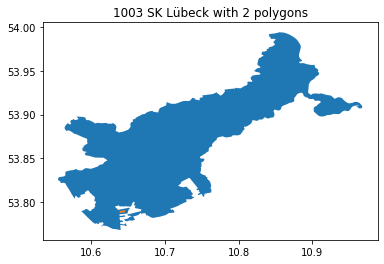

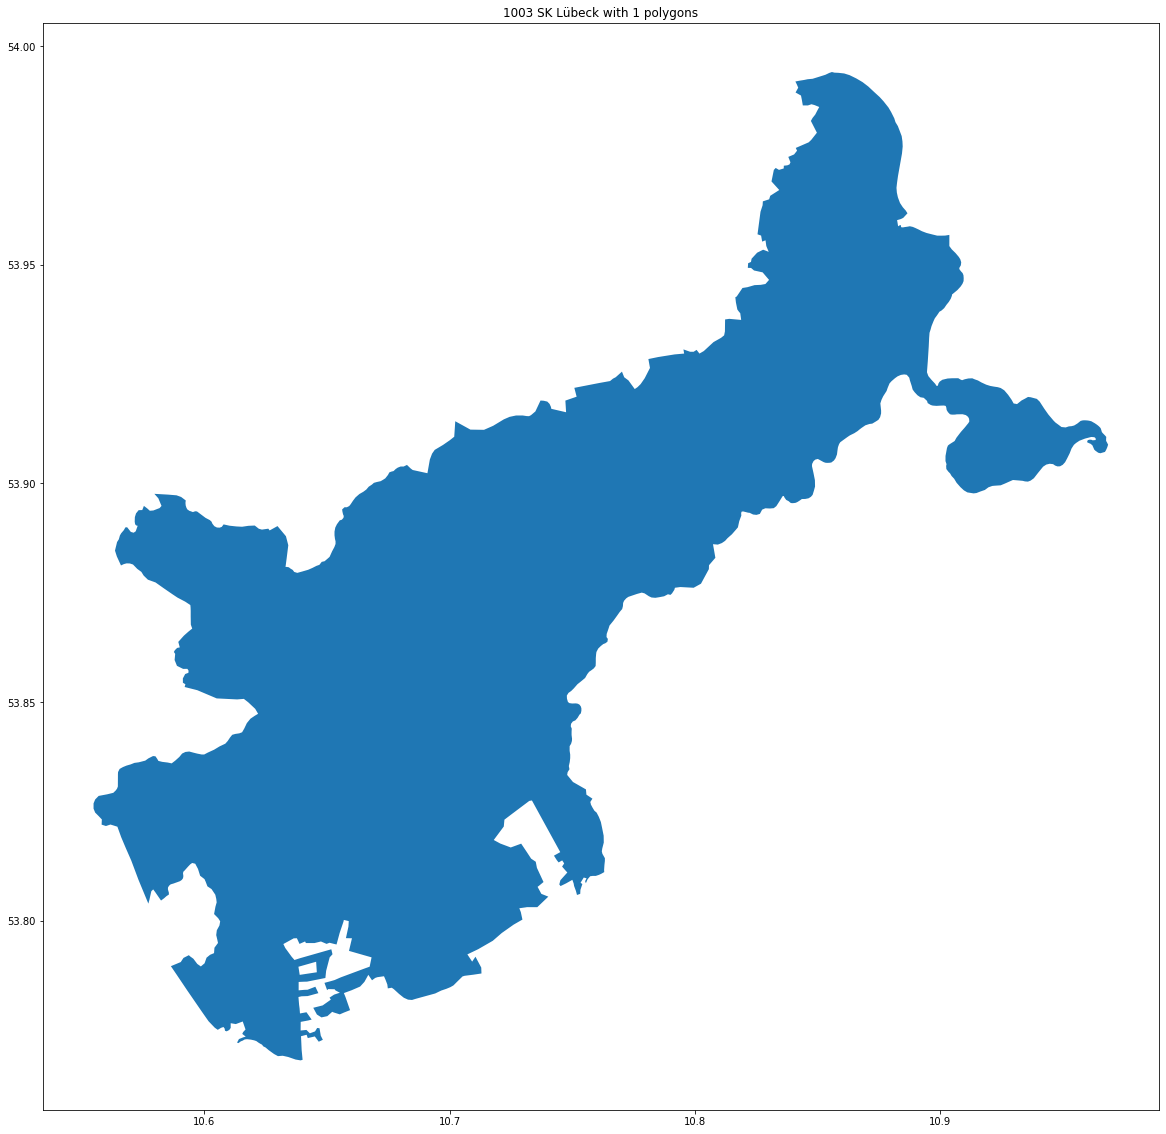

In [14]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [15]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [16]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [17]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "add", "add", "add", "add", "add", "add", "add", "add", "add", "add", "add", "add"])

In [18]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add"])

In [19]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "add", "add", "add", "add"])

In [20]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [21]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [22]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add"])

In [23]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [24]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "add"])

In [25]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [26]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [27]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [28]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [29]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "remove"])

In [30]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [31]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "add", "add", "add"])

In [32]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [33]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "add"])

In [34]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [35]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [36]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [37]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [38]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [39]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [40]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [41]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "add"])

In [42]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "add", "add"])

In [43]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [44]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [45]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [46]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "remove"])

In [47]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "remove"])

In [48]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [49]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [50]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "remove"])

In [51]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [52]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [53]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [54]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [55]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [56]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [57]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [58]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "remove", "remove", "remove"])

In [59]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [60]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "remove", "remove", "remove", "remove", "remove", "remove", "remove"])

In [61]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "remove"])

In [62]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add"])

In [63]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add"])

In [64]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "remove"])

In [65]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "remove"])

In [66]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "remove"])

In [67]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "remove", "remove"])

In [68]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [69]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [70]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [71]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [72]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [73]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [74]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [75]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "remove"])

In [76]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "remove", "remove"])

In [77]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [78]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [79]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [80]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [81]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [82]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [83]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [84]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [85]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "remove"])

In [86]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "remove"])

In [87]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [88]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [89]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [90]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [91]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [92]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [93]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [94]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [95]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [96]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [97]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [98]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "remove"])

In [99]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [100]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add"]*37)

In [101]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "add", "add", "remove", "remove"])

In [102]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add"]*21)

In [103]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add"])

In [104]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [105]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "remove"])

In [106]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [107]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove", "remove"])

In [108]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "remove"])

In [109]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "remove", "remove"])

In [110]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "remove"])

In [111]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [112]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add"])

In [113]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [114]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "remove"])

In [115]:
current_county_index = next(unchecked_counties)
draw_polygons_of_county(current_county_index)
set_polygons_of_county(current_county_index, ["add", "add", "add", "add", "remove"])

## Save modified data in file

In [116]:
if not(os.path.isdir("modified_data")): os.makedirs("modified_data")
with open("modified_data/german_county_shapes.txt", "w") as file:
    file.write(json.dumps(county_shapes))

## Draw the counties
Every countys shape can be reached by calling the value of "geometry" and afterwards "rings". Kept in a very basic way to demonstrate the used data.

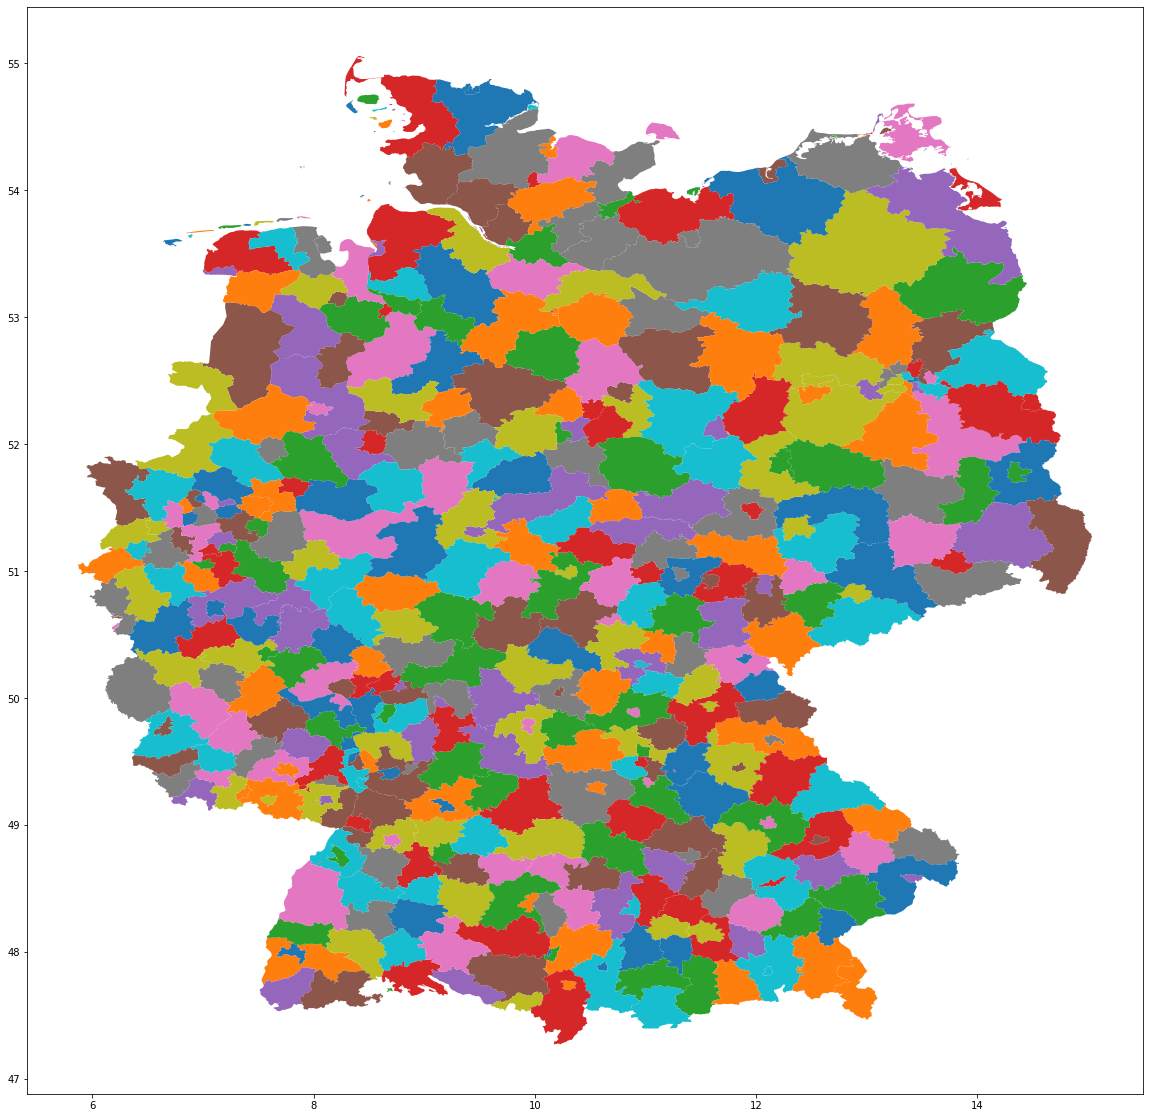

In [117]:
if plot_modified_county_shapes_for_rough_overview:
    plt.figure(figsize = (20, 20))    # enlarge plot
    for county in county_shapes.values():
        for polygon in county['geometry']:
            x,y = np.array(polygon).T
            plt.fill(x, y)
    plt.show()